In [1]:
using Plots

# Emission and absorption spectra from atoms

### Atom interactions with light

Lets consider the hamiltonian of an atom interacting with an electromagnetic field (EMF) in the dipole approximation:

$$H = H_{0} + H_{I}$$

$$H = \Big[\frac{p^{2}}{2m} + V(r)\Big] + e\mathbf{r}\cdot\mathbf{E}$$

where $H_{0}$ is the unperturbed hamiltonian of the atom, $H_{I}$ is the interaction hamiltonian, $p$ is the momentum operator, $m$ is the mass of the electron, $V(r)$ is the potential energy of the electron in the atom, $e$ is the charge of the electron, $\mathbf{r}$ is the position operator of the electron, and $\mathbf{E}$ is the electric field of the EMF.

### Classical field 

If we asume our field to be a rather nice classical field, we can write it as: $E(t) = E_{0}\cos(\omega t)$, where $E_{0}$ is the amplitude of the field and $\omega$ is the frequency of the field. In this regime, the probability of an atom changing its state from $|i\rangle$ to $|f\rangle$ is given by:

$$P_{f\leftarrow i} = -\frac{1}{\hbar^{2}}\Big|\int_{-\infty}^{\infty}\langle f|H_{I}|i\rangle e^{i\omega_{fi}t}dt\Big|^{2}$$

where $\omega_{fi} = \omega_{f} - \omega_{i}$ is the frequency of the transition between the states $|i\rangle$ and $|f\rangle$. If we assume that the atom is initially in the state $|i\rangle$, then the probability of the atom being in the state $|f\rangle$ is given by:

$$P_{f} = \frac{1}{\hbar^{2}}\Big[\frac{(\hat d \cdot E_0)\sin(\Delta t/2)}{\Delta /2}\Big]^{2}$$

we are calling $\Delta = \omega_{fi} - \omega$ and $\hat d = \langle f|\mathbf{r}|i\rangle$ is the dipole operator. The case where $\Delta = 0$ is called resonance, and the probability of the atom being in the state $|f\rangle$ is given by:

$$P_{f} = \Big(\frac{(\hat d \cdot E_0)t}{2\hbar}\Big)^{2}$$

So, as we can see, the $\Delta$ term is the detuning of the field with respect to the transition frequency of the atom. If we plot the probability of the atom being in the state $|f\rangle$, we have:


┌ Info: Saved animation to /home/jose/Documents/STUDY/Bsc/Optics/notes/04_atoms_light/P_fi.gif
└ @ Plots /home/jose/.julia/packages/Plots/io9zQ/src/animation.jl:156


Plots.AnimatedGif("/home/jose/Documents/STUDY/Bsc/Optics/notes/04_atoms_light/P_fi.gif")
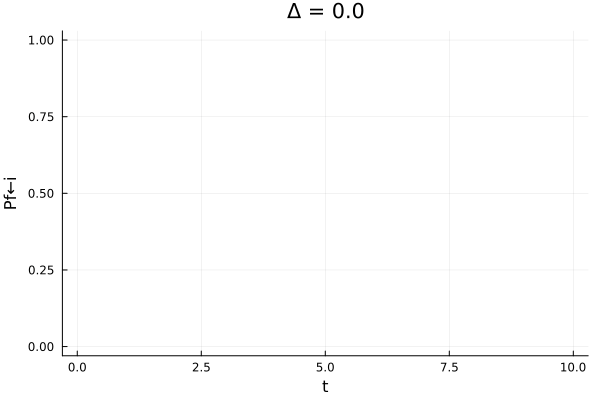

In [18]:
function P_fi(Δ, t; d=1, E=1)
    return (d*E)^2 .* sin.(Δ .* t ./ 2).^2 ./ (Δ./2).^2
end

function plot_Pt(Δ, t, title; d=1, E=1)
    plot(t, P_fi.(Δ, t; d=d, E=E), title=title, xlabel="t", ylabel="Pf←i", label="")
end

anim = @animate for Δ in 0:0.01:2
    plot_Pt(Δ, 0:0.1:10, "Δ = $Δ")
end
gif(anim, "P_fi.gif", fps=10)

Actually, the probability of the atom being in the state $|f\rangle$ when the time is very large (i.e. $t\rightarrow\infty$) is given by:

$$P_{fi} = \frac{\pi}{2}\Big(\frac{(\hat d \cdot E_0)_{fi}}{2\hbar}\Big)^{2}t\delta(\Delta)$$

Note also that there is no need for the emission to happen at a single frequency, but rather at a range of frequencies around the transition frequency:

$$P_{fi} = \frac{\pi}{2\hbar}F(\omega_{fi})t$$

where $F(\omega_{fi})$ is the spectral density of the field at the transition frequency $\omega_{fi}$: $$F(\omega_{fi}) = |\langle f| d\cdot E_0 |i\rangle|^{2}$$

## Quantized field

From the field quantization, we know that the electric field operator can be written as:

$$E = i \frac{\hbar \omega}{2\epsilon V} e [\hat a- \hat a^{\dagger}]$$

So, we can isolate the perturbation hamiltonian as:

$$H_{I} =  -d\cdot E = -i\frac{\hbar \omega}{2\epsilon V} (d\cdot e)[\hat a- \hat a^{\dagger}]$$

where $d$ is the dipole moment of the atom. Then, since all the allowed transitions only change the quantum number $n$ by one, we can write the matrix element of the dipole operator as a function of the atomic state $a$ and $b$, and the photon number $n$:

- Absorption: $$\langle b, n-1|d\cdot e|a, n\rangle  = -d\cdot e\sqrt{n}$$
- Emission: $$\langle b, n+1|d\cdot e|a, n\rangle  = -d\cdot e\sqrt{n+1}$$

For this later case, it becomes evident that although we might have an excited atom in $\ket{b}$ with no photons ($n=0$), the emission of a photon is possible. This is called the *spontaneous emission*. 

Also, if we have a random distribution, we will have a ratio of emission to absorption of:

$$\frac{P_{emission}}{P_{absorption}} = \frac{n+1}{n}$$

# Rabi Model

The Rabi model is a simple model that describes the interaction of a two-level (a ground state $\ket g$ and a excited state $\ket e$
) system with a classical field. The perturbation hamiltonian of the system is given by:

$$H_I = -d\cdot E_0 cos(\omega t)$$

And sicne we spect the wavefunction to be a linear combination of the ground and excited state, we can write the time-dependent Schrödinger equation as:

$$
\ket{\psi(t)} = c_g(t)\ket g e^{-i\omega_g t} + c_e(t)\ket e e^{-i\omega_e t}.
$$

An approximation of the Schrödinger solution to the coupled DE is obtained with the RWA approach (Rotating Wave Approximation), where we assume that the frequency of the field is much larger than the frequency of the transition between the states. In this case, we can write the solution as:

$$
C_e(t) = -i\frac{\langle e | d\cdot E_0|g \rangle }{\Omega \hbar} e^{-i t/2} \sin(\Omega t/2)\\
C_g(t) = e^{i t/2} \Big[ \cos(\Omega t/2) - i \frac{\Delta}{\Omega} \sin(\Omega t/2)\Big]
$$

The Rabi frequency $\Omega$ is given by:

$$
\Omega = \frac{\sqrt{(\omega - \omega_0)^2 + \langle e | d\cdot E_0|g \rangle ^2}}{\hbar}
$$

The probability of the atom being in the excited state is simply computed with the square of the coefficient $C_e(t)$:

$$
P_e(t) = \frac{\langle e | d\cdot E_0|g \rangle ^2}{\Omega^2 \hbar^2} \sin^2(\Omega t/2)
$$

A very important concept are inversion, which is defined as the difference between the probability of the atom being in the excited state and the probability of the atom being in the ground state:

$$
W(t) = P_e(t) - P_g(t) = -cos(\langle e | d\cdot E_0|g \rangle t/\hbar) 
$$  


# Jaynes-Cummings Model

The Jaynes-Cummings model is a model that describes the interaction of a two-level system with a fully quantized field. Recall the quantized field is:

$$
E = e \sqrt{\frac{\hbar \omega}{2\epsilon V}} [\hat a+ \hat a^{\dagger}] \sin(kz)
$$

And the Hamiltonian of the system is given by:

$$
H_I = -d\cdot E = -d\cdot \underbrace{e \sqrt{\frac{\hbar \omega}{2\epsilon V}}}_{\equiv g} [\hat a- \hat a^{\dagger}] \sin(kz)
$$

To get an easier expression for interacting with the light field, we will introduce the (Pauli) atomic operators:

$$
\sigma_+ = \ket e \bra g \quad (\text{Transition from ground to excited state})\\
\sigma_- = \ket g \bra e \quad (\text{Transition from excited to ground state})\\
\sigma_z = \ket e \bra e - \ket g \bra g \quad (\text{Population inversion})
$$

Then, the electric Dipole operator can be written as:

$$
\hat d = d\ket e \bra g + d^*\ket g \bra e = d(\sigma_+ + \sigma_-)
$$

And the Hamiltonian of the system can be rewritten as:

$$
H_I = dg(\sigma_+ + \sigma_-) [\hat a+ \hat a^{\dagger}]
$$  

The total Hamiltonian of the system is given by:

$$
H = H_0 + H_I = \frac{\hbar \omega}{2} \sigma_z + \hbar \omega \hat a^{\dagger} \hat a + dg(\sigma_+ + \sigma_-) [\hat a+ \hat a^{\dagger}]
$$

Also, we have to conserve energy, this is... either the atom is excited or the field has a photon. Therefore:

$$(\sigma_+ + \sigma_-) [\hat a+ \hat a^{\dagger}] = \sigma_+ \hat a + \sigma_- \hat a^{\dagger}$$

A simple case is the resonant case $\Delta = 0$, and with all the initial population in the excited state $\ket e$. In this case, the inversion simply traces a sinusoidal function:

$$
\ket{\psi(t)} = \cos(dg \sqrt{n+1}t/\hbar)\ket{e}\ket{n} - i \sin(dg \sqrt{n+1}t/\hbar)\ket{g}\ket{n+1}
$$

where $n$ is the number of photons in the field. The inversion is also particularly simple:

$$
W(t) = -\cos(\underbrace{\Omega}_{2dg\sqrt{n+1}/\hbar} t)
$$

Moreover, the most general case is when we have a superposition of the ground and excited state, and the field is in a coherent state:

$$
W(t) = e^{-\bar n }\sum_{n=0}^{\infty} \frac{\bar n^n}{n!} \cos(2dg\sqrt{n+1}t/\hbar)
$$

From a simple analysis, one would expect that the oscillations of the inversion would be damped by the field. However, this is not the case. The oscillations are damped by the spontaneous emission of the atom and for large times, a *revival* of the oscillations is observed:

$$
W(t) \approx \cos\Big(2dg\sqrt{\bar n +1 }t/\hbar + dg\frac{\bar n}{\bar n+1}t/\hbar - \bar n \sin(\frac{dgt}{\hbar\sqrt{\bar n+1}})\Big)e^{-\bar n (1-\cos(dgt/\hbar\sqrt{\bar n+1}))}
$$

┌ Info: Saved animation to /tmp/jl_nklot4z4HK.gif
└ @ Plots /home/jose/.julia/packages/Plots/io9zQ/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_nklot4z4HK.gif")
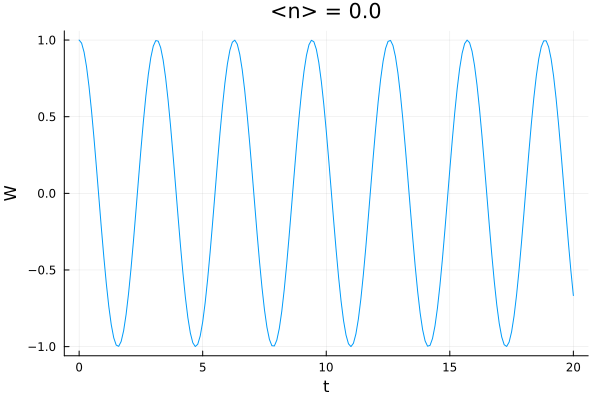

In [45]:
function W(t, n_bar)
    dg = 1.5
    hbar = 1
    t = t/dg
    term1 = 2dg*sqrt(n_bar + 1)*t/hbar
    term2 = dg*n_bar/(n_bar + 1)*t/hbar
    term3 = n_bar*sin(dg*t/(hbar*sqrt(n_bar + 1)))/sqrt(n_bar + 1)
    term4 = n_bar*(1 - cos(dg*t/(hbar*sqrt(n_bar + 1))))
    return cos(term1 + term2 - term3)*exp(-n_bar*term4)
end

function plot_Wt(n_bar)
    t = 0:0.1:20
    plot(t, W.(t, n_bar), title="<n> = $n_bar", xlabel="t", ylabel="W", label="")
end

@gif for n_bar in 0:0.01:15
    plot_Wt(n_bar)
end every 10

## Dressed states

The dressed states are the eigenstates of the Jaynes-Cummings Hamiltonian. The eigenstates are given by:

- $\ket{e,n}$: The atom is in the excited state and the field has $n$ photons.
- $\ket{g,n+1}$: The atom is in the ground state and the field has $n+1$ photons.
  
Thus, a matrix representation of the Hamiltonian is given by:

$$
H = \begin{pmatrix}
n\omega + \frac{\omega}{2} & dg\sqrt{n+1}\\
dg\sqrt{n+1} & (n+1)\omega - \frac{\omega}{2}
\end{pmatrix}
$$

The eigenvalues of this matrix are given by:

$$
E_{\pm} = (n+\frac{1}{2})\hbar \omega \pm \frac{1}{2}\hbar \Omega
$$

where $\Omega = 2dg\sqrt{n+1}/\hbar$ is the Rabi frequency. The eigenstates are given by:

$$
\ket{n, +} = \cos(\theta_n/2)\ket{e,n} + \sin(\theta_n/2)\ket{g,n+1}\\
\ket{n, -} = -\sin(\theta_n/2)\ket{e,n} + \cos(\theta_n/2)\ket{g,n+1}
$$

where $\tan(\theta_n) = \Omega/\Delta$. The dressed states are the eigenstates of the Jaynes-Cummings Hamiltonian. The dressed states are the eigenstates of the Jaynes-Cummings Hamiltonian. So this is simply a rotation of the basis of the system:

$$
\ket{n, +} = \frac{1}{\sqrt{2}}(\ket{e,n} + \ket{g,n+1})\\
\ket{n, -} = \frac{1}{\sqrt{2}}(-\ket{e,n} + \ket{g,n+1})
$$

## Schmidt decomposition

We know from the Schmidt decomposition that any state can be written  in terms of two bases:

$$
\ket{\psi} = g_1\ket{u_1} \otimes \ket{v_1} + g_2\ket{u_2} \otimes \ket{v_2} + \dots
$$

So transforming the basis of the system to the dressed states, we can write a density matrix as:

$$
\rho = \sum_{n=0}^{\infty} \sum_{\pm} p_{n,\pm} \ket{n,\pm}\bra{n,\pm} = \begin{pmatrix}
\sum_{n=0}^{\infty} p_{n,+} \cos^2(\theta_n/2) & \sum_{n=0}^{\infty} p_{n,+} \cos(\theta_n/2)\sin(\theta_n/2)\\
\sum_{n=0}^{\infty} p_{n,+} \cos(\theta_n/2)\sin(\theta_n/2) & \sum_{n=0}^{\infty} p_{n,+} \sin^2(\theta_n/2)
\end{pmatrix}
$$